# Final exam (take-home; <u>due 5/12</u>)

You will need the same packages you've used for the homework assignments.

In [30]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


# added libraries 
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA


from scipy.stats import mode


import keras  
from keras.utils import to_categorical
from keras.optimizers import RMSprop
from keras.layers.convolutional import Conv2D
from keras.models import Sequential, Model
from keras.layers import Activation, Dense, Dropout,Input, MaxPooling2D, Dropout, Flatten
from keras import backend as k 

import tensorflow as tf


from keract import get_gradients_of_trainable_weights, display_gradients_of_trainable_weights

from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix,accuracy_score

import seaborn as sns

import numpy as np 
import pandas as pd



## Part 1: Handwritten digits (small)

First, load the dataset (which, in the interest of time, is rather small) and perform a test-train split; please retain the random seed value (so results are repeatable across different runs of the code).

In [21]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

digits = load_digits()

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

Let's also examine a few of the actual images, to get an idea of what the data looks like:

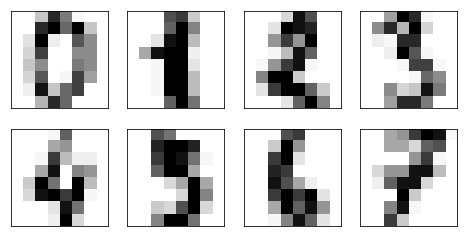

In [22]:
plt.figure(figsize=(8,4))
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(digits.images[i], cmap=plt.cm.Greys)

### 1.1 Baseline classification

To establish a baseline, train a logistic regression model.  Explain how you chose any hyper-parameters, and evaluate it on the test set.

In [138]:
X_train.shape

(1347, 64)

In [139]:
y_train.shape

(1347,)

In [140]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [141]:
np.unique(y_test)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [142]:

def show_images(images, cols = 5, cmap=plt.cm.gray, im_shape=None, fig=None):
    if fig is None:
        fig = plt.figure(figsize=(10,5))
    dims = images.shape
    if len(dims) not in (2,3):
        raise ValueError("images must be either 2D or 3D array")
    if len(dims) == 3:
        if im_shape is not None:
            raise ValueError("im_shape redundant when images is a 3D array")
        else:
            im_shape = dims[1:]
    if len(dims) == 2 and im_shape is None:
        L = int(np.sqrt(dims[1]))
        if L*L != dims[1]:
            raise ValueError("im_shape is missing and number of columns not a perfect square")
        im_shape = (L, L)
    N = dims[0]
    rows = (N + cols - 1)//cols
    for i in range(N):
        ax = fig.add_subplot(rows, cols, i+1)
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(images[i,...].reshape(im_shape), cmap=cmap)
        

In [143]:
np.power(10.0, np.arange(0, 10))

array([1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06, 1.e+07,
       1.e+08, 1.e+09])

In [149]:
# TODO - Your code here

def logistic_bestpara_cv(penalty):
    logistic_searchCV = LogisticRegressionCV( 
        Cs = list(np.power(10.0, np.arange(0, 11)))
        ,penalty = penalty
        ,cv = 10
        ,scoring ='accuracy'
        ,max_iter = 10000
        ,solver = 'saga'
        ,tol = 10
        ,multi_class = "multinomial"
        ,random_state = 42
        )
    
    logistic_searchCV.get_params()
    logistic_searchCV.fit(X_train, y_train)
    
    print('Max accuracy regularization Cs  = 10 ^',logistic_searchCV.scores_[1].mean(axis=0).argmax())  
    print('or ie Cs = ', 10**logistic_searchCV.scores_[1].mean(axis=0).argmax())  
    print('Max accuracy train = ', logistic_searchCV.scores_[1].mean(axis=0).max())  
    print('Test Accuracy :' , accuracy_score(y_test, logistic_searchCV.predict(X_test)))
    
    return logistic_searchCV.scores_[1], logistic_searchCV.coef_

def box_plot(input_array):
    box_plot = input_array
    df = pd.DataFrame({'1.e-00':box_plot[:,0], '1.e-01':box_plot[:,1], 
                       '1.e-02':box_plot[:,2], '1.e-03': box_plot[:,3],
                       '1.e-04':box_plot[:,4], '1.e-05':box_plot[:,5],
                       '1.e+06':box_plot[:,6], '1.e+07':box_plot[:,7], 
                        '1.e+08':box_plot[:,8], '1.e+09':box_plot[:,9]})
    df.plot.box(figsize =[10,6])
    

def show_images_coef(coef_val):    
    show_images(coef_val)

    

In [150]:
l1_best, l1_coef = logistic_bestpara_cv('l1') # L1 regularizer 

Max accuracy regularization Cs  = 10 ^ 9
or ie Cs =  1000000000
Max accuracy train =  0.9689438558691265
Test Accuracy : 0.9577777777777777


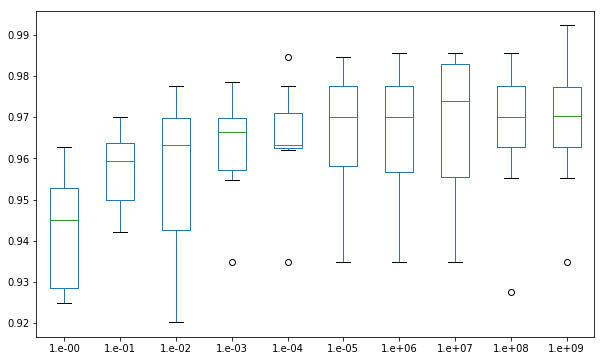

In [151]:
box_plot(l1_best) # L1 regularizer 

In [152]:
l2_best, l2_coef = logistic_bestpara_cv('l2') # l2 regularizer 


Max accuracy regularization Cs  = 10 ^ 10
or ie Cs =  10000000000
Max accuracy train =  0.9704195581657243
Test Accuracy : 0.9555555555555556


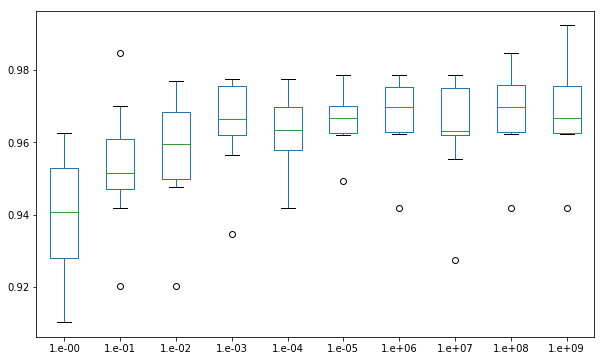

In [153]:
box_plot(l2_best) # L2 regularizer 

Plot the model's coefficients (ignoring intercept, if your model has one) as an image; does it have any intuitive interpretation?

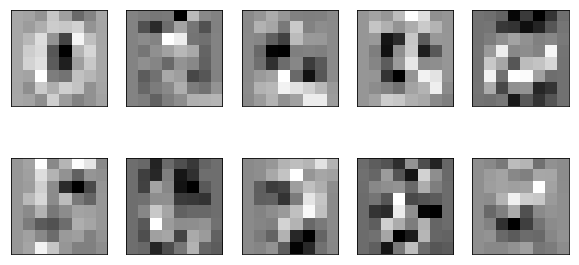

In [154]:
show_images_coef(l1_coef)

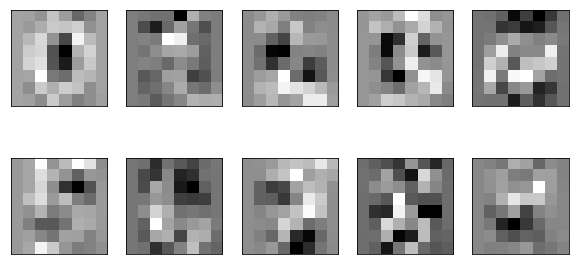

In [155]:
# TODO - Your code here
show_images_coef(l2_coef)


In [156]:
#l1_coef == l2_coef # they arent equal. They might look equal tho. 

---

**Remarks (1.1)**

(i) Hyper-parameter choice/tuning; remarks on test performance, if any.

(ii) Intuitive interpretation of coefficients?

---

---
**Remarks (1.1)**

(i) Hyper-parameter optimization was done using the LogisticRgressionCV over panelty : 'l1' and 'l2' and using different Cs values. We see the test accuracy is mostly similar but 'l1' wins with small margin over 'l2' with Cs = '10^9'. 

(ii) The coficients do help us represent the areas of the digits images the model deems important.

---

### 1.2.1 Two-layer perceptron

Next, train a two-layer perceptron.  Explain how you chose the number of hidden units, any other model settings/hyper-parameters (as applicable), and evaluate your model on the test set.

In [ ]:
# TODO - Your code here

def show_summary_stats(history):
    # List all data in history
    print(history.history.keys())

    # Summarize history for accuracy
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    # Summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()



In [46]:
# TODO - Your code here

#K_hidden = 2 

X_train_ = X_train.astype('float32')
X_test_ = X_test.astype('float32')
X_train_ /= 255
X_test_ /= 255
print(X_train_.shape, 'train samples')
print(X_test_.shape[0], 'test samples')
y3_train = to_categorical(y_train)
y3_test = to_categorical(y_test)

(1347, 64) train samples
450 test samples


In [47]:
#### from keras.layers import Dense, Dropout

batch_size = 128
epochs = 90
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(64,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(X_train_, y3_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (X_test_, y3_test))

score = model.evaluate(X_test, y3_test, verbose=0)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 512)               33280     
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                5130      
Total params: 301,066
Trainable params: 301,066
Non-trainable params: 0
_________________________________________________________________
Train on 1347 samples, validate on 450 samples
Epoch 1/90
1347/1347 [==============================] - 0s 214us/step - loss: 2.1762 - ac

In [48]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.125073980225457
Test accuracy: 0.9266666666666666


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


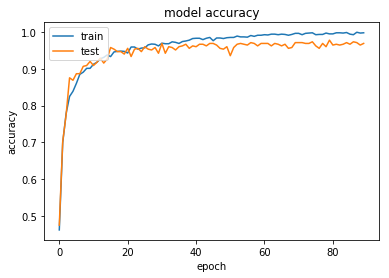

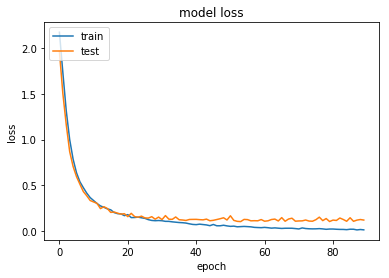

In [177]:

show_summary_stats(history)


Plot the hidden layer model coefficients as images; do they have any intuitive interpretation?  Do any of them relate to the coefficients in the logistic relation model?

In [61]:
display = get_gradients_of_trainable_weights(model, X_train, y3_train)
display.keys()

dict_keys(['dense_10/kernel:0', 'dense_10/bias:0', 'dense_11/kernel:0', 'dense_11/bias:0', 'dense_12/kernel:0', 'dense_12/bias:0'])

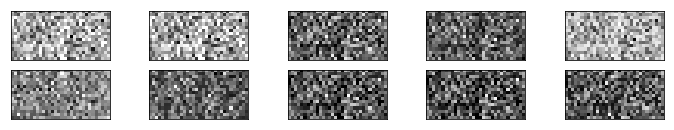

In [176]:
fig, ax = plt.subplots(2, 5, figsize=(12, 2))

display_arr = np.array(display['dense_11/kernel:0']).T
data_points = display_arr[0:10]

centers = data_points.reshape(10,16,32)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

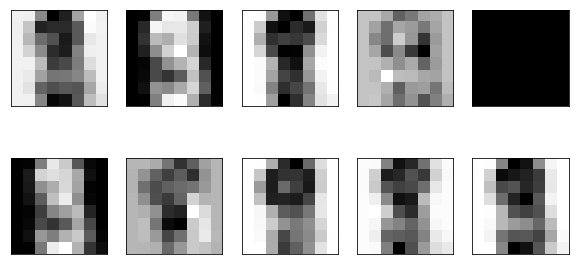

In [63]:

# TODO - Your code here


display = get_gradients_of_trainable_weights(model, X_train_, y3_train)
#display['dense_40/kernel:0'].shape
display_arr = np.array(display['dense_10/kernel:0']).T
data_points = display_arr[300:310]
#data_points.shape
show_images(data_points, cols = 5, cmap = plt.cm.gray)


---

**Remarks (1.2.1)**

(i) Number of hidden units and other hyper-parameter choice/tuning.

(ii) Intuitive interpretation of model coefficients.

(iii) Relation to logistic regression model coefficients (if any).

---


**Answers (1.2.1)**


(i) Hidden units was chosen on the basis of best accuracy. 

(ii) The model coffecients do look like blurred digits.

(iii) They do look similar to logistic regression model coffecients.


### 1.2.2 Original vs. "learned" features

\[For this section, you can ignore the testing set\]

Plot the training samples using in a two-dimensional space, by performing PCA on the original, 64-dimensional features.  **Color each point based on it's class.**  Do any clusters emerge, and do they correspond to the classes?

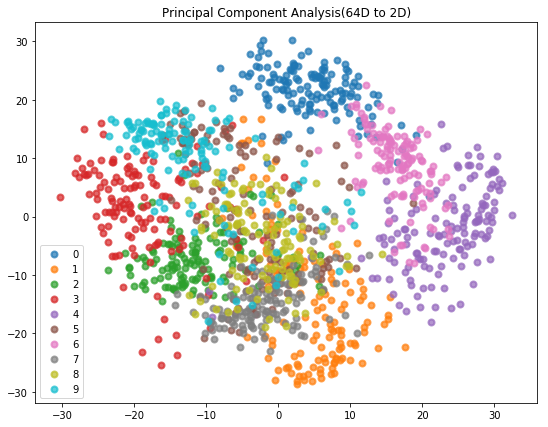

In [24]:
# TODO - Your code here
from sklearn.decomposition import PCA
import numpy as np

pca = PCA(n_components=2)
x_transformed = pca.fit_transform(X_train)
plt.figure(figsize=(9,7))
lw = 2

for i, target_name in zip([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], np.unique(y_test)):
    plt.scatter(x_transformed[y_train == i, 0], x_transformed[y_train == i, 1], alpha=.7, lw=lw,
                label=target_name)
plt.legend(loc = 'best', shadow = False, scatterpoints = 1)
plt.title('Principal Component Analysis(64D to 2D)')
plt.show()

Next, repeat the same, but instead of the 64-dimensional features, use the $M$-dimensional set of first-layer values ("neuron activations") from your 2LP (where $M$ is the number of hidden units).  Do the learned, non-linear features do better, worse, or about the same wrt.\ emergent clusters?

In [29]:
# TODO - Your code here
activations = get_activations(modelc, X_train)
activations.keys()


NameError: name 'modelc' is not defined

In [68]:
activations_first_layer = activations['dense_11/Relu:0']
activations_first_layer.shape

(1347, 512)

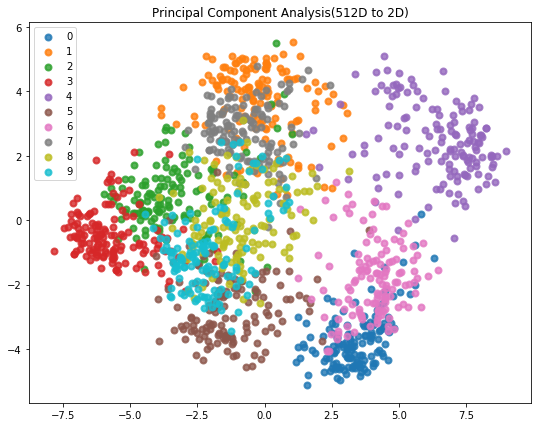

In [69]:
pca = PCA(n_components=2)
x_transformed_LP = pca.fit_transform(activations_first_layer)

plt.figure(figsize=(9,7))
lw = 2
for i, target_name in zip([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], np.unique(y_test)):
    plt.scatter(x_transformed_LP[y_train == i, 0], x_transformed_LP[y_train == i, 1], alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc = 'best', shadow = False, scatterpoints = 1)
plt.title('Principal Component Analysis(512D to 2D)')
plt.show()

Apply $K$-means with $K=10$ (i.e., the number of distinct classes in the original data) on both the 64-dimensional and $M$-dimensional feature spaces.  Once the clustering is complete assign a digit label to each cluster; rather than do so manually, simply assign the "majority label" to each cluster (i.e., the label that appears more frequently among the points belonging to the cluster).  Print out the confusion matrices for both sets of 10 clusters (one matrix for each feature space).  What is the overall "accuracy" of each clustering wrt.\ recovering the original labels?  Is one better than the other, and why (same question as above, but with quantifiable results)?

In [89]:
# TODO - Your code here
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(X_train)
kmeans.cluster_centers_.shape

(10, 64)

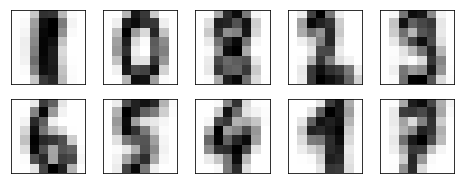

In [90]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [95]:
clusters.shape

(1347,)

In [96]:

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(y_train[mask])[0]

In [98]:
accuracy_score(y_train, labels)

0.7928730512249443

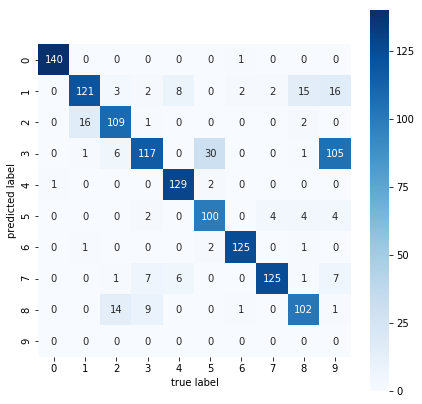

In [100]:
#confusion_matrix(y_train, predicted_K)
mat = confusion_matrix(y_train, labels)

plt.figure(figsize=(7, 7))

sns.heatmap(mat.T, xticklabels=np.unique(y_train),
            annot=True,fmt="d",square=True, yticklabels=np.unique(y_train), cmap="Blues")
plt.xlabel('true label')
plt.ylabel('predicted label');

# For the 512 DIM - Deep Leaning

In [125]:
kmeans_dp = KMeans(n_clusters=10, random_state=0)
clusters_ = kmeans_dp.fit_predict(activations_first_layer)
kmeans_dp.cluster_centers_.shape

(10, 512)

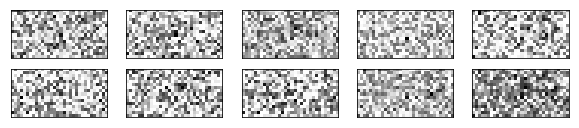

In [127]:
fig, ax = plt.subplots(2, 5, figsize=(10, 2))
centers = kmeans_dp.cluster_centers_.reshape(10, 16,32)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [129]:
labels_ = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters_ == i)
    labels_[mask] = mode(y_train[mask])[0]

In [131]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, labels)

0.9881217520415738

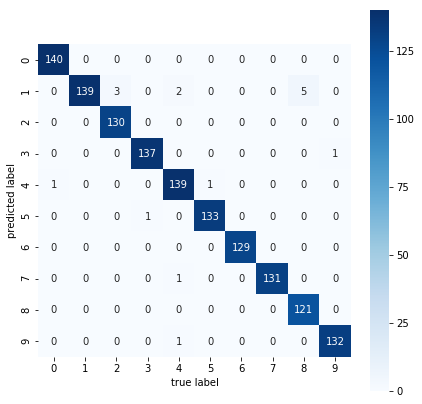

In [130]:
mat = confusion_matrix(y_train, labels_)

plt.figure(figsize=(7, 7))

sns.heatmap(mat.T, xticklabels=np.unique(y_train),
            annot=True,fmt="d",square=True, yticklabels=np.unique(y_train), cmap="Blues")
plt.xlabel('true label')
plt.ylabel('predicted label');

---

**Remarks (1.2.2)**

(i) Original feature space (pixel values), and K-means clusters on it.


(ii) Hidden-layer features space, and K-means clusters on it.

(iii) Brief discussion of performance (confusion matrix, "accuracy" of clustering on each feature space).

---

**Answers (1.2.2)**

(i) We used 64 dimentions to cluster the digits over the images using K- Means. We get an accuracy of **79.28%** on perfoming K means over the base orignal feature space.

(ii) We used 512 dimentions to cluster the hidden layer feature space over the images using the K-Means. We get an accuracy of **98.18%** after performing K- Means Clustering over it.

(iii) Accuracy drastically imporved when we perfomed K-Means over the 512 dimention deep learning hidden layer feature space. We see in the orignal inputs's confusion matrix the K-Means cannot cluster any digits as 9 and confusing it to be 3 which is over come in the hidden layer feature space.

### 1.3 $k$-NN graph and clustering

\[For this section you can ignore the testing set\]

Write a function `knn_graph(X, k, y=None)` which accepts a $N\times D$ matrix representing a collection of $N$ $D$-dimensional points, and returns a NetworkX weighted undirected graph representing their _symmetric $k$ nearest neighbor ($k$-NN) graph_ using Euclidean distance.  Use the row number `i`, $0\le i < N$, as the node IDs and store the edge weights in the `weight` edge attribute.  Also, for each node, add a `features` node attribute that stores the $D$-dimensional vector, for convenient access.  Furthermore, if the `y` argument is provided, use it to assign a `label` node attribute value, again for convenient access.

The _symmetric $k$-NN graph_ has an edge between nodes $i$ and $j$ if either $j$ is in among the $k$ nearest neighbors of $i$ or vice-versa (i.e., $i$ is among the $k$-NNs of $j$).  

Formally, given nodes/points $0\le i,j< N$, the set of $k$-NNs of $i$ is defined as
$$ \mathcal{N}^{(k)}(i) := \{ j \mid j\ne i \text{ and } \|\mathbf{x}_j - \mathbf{x}_i\| \le d^{(k)}(i) \} $$
where $d^{(k)}(i)$ denotes the $k$-th smallest value in the sequence of distances $( \|\mathbf{x}_i-\mathbf{x}_j\|)_{0\le j< N \text{ and } j\ne i}$.  Note that $|\mathcal{N}^{(k)}(i)| \ge k$; if there are ties, the $k$-NN set may have more than $k$ elements.  Given this definition, the $k$-NN graph's edges are defined by
$$ (i,j)\in E \quad\text{ if and only if }\quad i \in \mathcal{N}^{(k)}(j) \text{ or } j \in \mathcal{N}^{(k)}(i) $$
with node weights equal to their distance,
$$ w(i,j) := \|\mathbf{x}_i - \mathbf{x}_j\|. $$
Clearly, if $k=N$, the $k$-NN graph becomes the standard Euclidean matrix.

In [11]:
# TODO - Your code here
import networkx as nx

# row number : i  range 0 to N -  as the Node IDs 
# edge weight - 'weight' edge attribute 
# node  - feature node that stores the D Dimentional vector 
# y argument - label node 

def knn_graph(X, k, y=None):
    pass

In [18]:

g = nx.Graph()
i_dict = {}


ini = 1
    for row in csv_dict:
        for i in row:
            #print(row[i])
            if type(row[i]) is str:
                g.add_edge(ini, int(i), weight=(float(row[i])))
        ini += 1

pos=nx.spring_layout(g, scale=100.)
nx.draw_networkx_nodes(g, pos)
nx.draw_networkx_edges(g,pos)
nx.draw_networkx_labels(g,pos)
plt.axis('off')
plt.show()


{1: 2.0, 2: 1.5}

**Why do you think** that using the $k$-NN graph, rather than the full Euclidean distance matrix (i.e., the $N$-NN graph) might intuitively be better or worse?

For each value of $k=1$, $3$, and $10$, construct the $k$-NN graph of the original $D=64$ dimensional features (pixel values), and draw it using a **spectral layout**. **Color each vertex according to it's label**.
How well do the graphs recover the original labels?  Do any values of $k$ perform differently?  Please draw the graphs in **one plot with three sub-plots on one row**.

In [12]:
# TODO - Your code here

from sklearn.neighbors import KNeighborsClassifier



Finally, partition the $k$-NN graph for $k=3$ to $K=10$ sets of vertices.  Describe the partitioning method you chose and _briefly_ explain why.  Again, use majority-labeling for each partition and, based on this, print out the confusion matrix and report overall accuracy (i.e., sum of diagonals over sum of all elements of confusion matrix).  Briefly discuss how this performs versus previous $K$-means clustering approaches.

---

**Remarks (1.3)**

(i) Why/when might the $k$-NN graph be better/worse than the full Euclidean distance matrix?

(ii) Discussion on various $k$ values and how well they might recover classes.

(iii) Describe and _briefly_ justify your graph partitioning method.

(iv) Briefly discuss partitioning of the $k$-NN graph vs. $K$-means on the original feature space.

---

### 1.4 Open-ended analysis

Devise your own method, either supervised or unsupervised (choose one of the two), to discover digits from images.  You may use methods available in Scikit-learn, Keras/Tensorflow, and NetworkX. Describe, _concisely_ but _accurately_, _what_ you did and, more importantly, _why_ you did it.

You might want to leave this section for the end.  Your approach does not have to be Turing-award winning research!  I am mostly interested in seeing _how you approach a problem_ and _how you think_, rather than in the result itself.  You can think of this as a job interview question, where the goal is very similar.  Be _clear_ and _precise_, while keeping your answers _short and to the point_.  

Include any code and plots you deem necessary to support your decisions and your analysis, as well as briefly illustrate it's results.  Feel free to create as many code and markdown cells as necessary. 

**However**, please summarize your overall approach and analysis in the "Remarks (1.4)" cell; your summary should be self-contained (you can of course reference other cells for _further_ details, but it should be possible to understand your summary on it's own).  Please structure your overall work to avoid repetition (e.g., do not just copy-paste all the text before the "Remarks" cell).

In [346]:
X_train.shape

(1347, 64)

In [348]:
# TODO

img_rows = 8
img_cols = 8

X_train_conv = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test_conv = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

#more reshaping
X_train_conv = X_train_conv.astype('float32')
X_test_conv = X_test_conv.astype('float32')
X_train_conv /= 255
X_test_conv /= 255
print('x_train shape:', X_train_conv.shape)
print('Number of images in x_train_conv', X_train_conv.shape[0])
print('Number of images in x_test_conv', X_test_conv.shape[0])


x_train shape: (1347, 8, 8, 1)
Number of images in x_train_conv 1347
Number of images in x_test_conv 450


In [349]:
# Creating a Sequential Model and adding the layers


modelc = Sequential()
modelc.add(Conv2D(8, kernel_size=(3,3), input_shape=input_shape))
modelc.add(MaxPooling2D(pool_size=(2, 2)))
modelc.add(Flatten()) # Flattening the 2D arrays for fully connected layers
modelc.add(Dense(128, activation=tf.nn.relu))
modelc.add(Dropout(0.2))
modelc.add(Dense(10,activation=tf.nn.softmax))
modelc.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
modelc.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 6, 6, 8)           80        
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 3, 3, 8)           0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 72)                0         
_________________________________________________________________
dense_44 (Dense)             (None, 128)               9344      
_________________________________________________________________
dropout_25 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_45 (Dense)             (None, 10)                1290      
Total params: 10,714
Trainable params: 10,714
Non-trainable params: 0
_________________________________________________________________


In [350]:
modelc.fit(x = X_train_conv, y = y_train, epochs = 100)


Epoch 1/100
1347/1347 [==============================] - 1s 518us/step - loss: 2.2904 - acc: 0.1834
Epoch 2/100
1347/1347 [==============================] - 0s 47us/step - loss: 2.2467 - acc: 0.5494
Epoch 3/100
1347/1347 [==============================] - 0s 47us/step - loss: 2.1494 - acc: 0.6451
Epoch 4/100
1347/1347 [==============================] - 0s 47us/step - loss: 1.9519 - acc: 0.7186
Epoch 5/100
1347/1347 [==============================] - 0s 47us/step - loss: 1.6482 - acc: 0.7506
Epoch 6/100
1347/1347 [==============================] - 0s 47us/step - loss: 1.3175 - acc: 0.7610
Epoch 7/100
1347/1347 [==============================] - 0s 49us/step - loss: 1.0497 - acc: 0.7840
Epoch 8/100
1347/1347 [==============================] - 0s 46us/step - loss: 0.8680 - acc: 0.8263
Epoch 9/100
1347/1347 [==============================] - 0s 47us/step - loss: 0.7452 - acc: 0.8293
Epoch 10/100
1347/1347 [==============================] - 0s 47us/step - loss: 0.6498 - acc: 0.8486
Epoch 11

1347/1347 [==============================] - 0s 50us/step - loss: 0.0491 - acc: 0.9859
Epoch 84/100
1347/1347 [==============================] - 0s 50us/step - loss: 0.0519 - acc: 0.9881
Epoch 85/100
1347/1347 [==============================] - 0s 45us/step - loss: 0.0475 - acc: 0.9896
Epoch 86/100
1347/1347 [==============================] - 0s 53us/step - loss: 0.0545 - acc: 0.9852
Epoch 87/100
1347/1347 [==============================] - 0s 58us/step - loss: 0.0500 - acc: 0.9889
Epoch 88/100
1347/1347 [==============================] - 0s 47us/step - loss: 0.0511 - acc: 0.9852
Epoch 89/100
1347/1347 [==============================] - 0s 47us/step - loss: 0.0496 - acc: 0.9896
Epoch 90/100
1347/1347 [==============================] - 0s 46us/step - loss: 0.0476 - acc: 0.9874
Epoch 91/100
1347/1347 [==============================] - 0s 49us/step - loss: 0.0485 - acc: 0.9874
Epoch 92/100
1347/1347 [==============================] - 0s 48us/step - loss: 0.0438 - acc: 0.9903
Epoch 93/100


In [352]:
score = modelc.evaluate(X_test_conv, y_test)

450/450 [==============================] - 0s 582us/step


In [353]:
print("Model Accuracy : %f " % score[1])

Model Accuracy : 0.971111 


In [ ]:
def show_summary_stats(history):
    # List all data in history
    print(history.history.keys())

    # Summarize history for accuracy
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    # Summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [ ]:
show_summary_stats(history)


---

**Remarks (1.4)**

Brief but complete and self-contained summary of _what_ you did and _why_.

---

---

**Answer (1.4)**

I tried Convoluted Neural Net. Cause CNN perfoms the best with image dataset. I got an accuracy score of 97.11%. 



---

## Part 2: Karate club

[Zachary's karate club](https://en.wikipedia.org/wiki/Zachary%27s_karate_club) is a tiny but famous (almost cult?) dataset in network science. You can read more about the story behind it in the linked Wikipedia article (note that the NetworkX version's vertex IDs start from 0, not 1, hence "Mr. Hi" is 0 and "John A." is 33).

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
Gzk = nx.karate_club_graph()

Let's take a look at the graph (you don't have to use the same style in your plots, by the way):

/Users/shradhitsubudhi/anaconda3/envs/python37/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


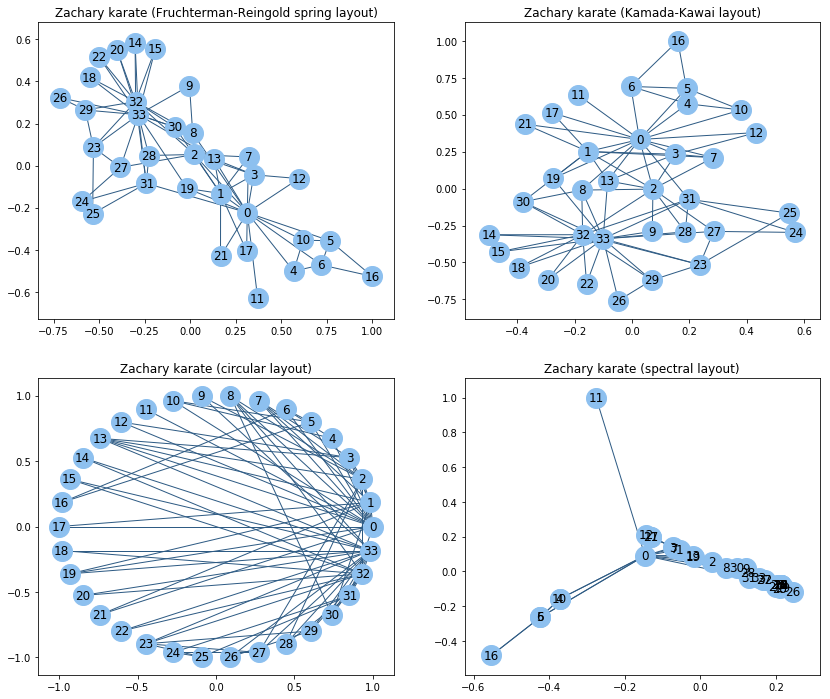

In [5]:
plt.figure(figsize=(14,12))
plt.subplot(2,2,1)
nx.draw_networkx(Gzk, pos=nx.drawing.spring_layout(Gzk, seed=10), 
                 node_size=400, node_color='#8dc0ef', edge_color='#2e5b84')
plt.title('Zachary karate (Fruchterman-Reingold spring layout)')
plt.subplot(2,2,2)
nx.draw_networkx(Gzk, pos=nx.drawing.kamada_kawai_layout(Gzk), 
                 node_size=400, node_color='#8dc0ef', edge_color='#2e5b84')
plt.title('Zachary karate (Kamada-Kawai layout)')
plt.subplot(2,2,3)
nx.draw_networkx(Gzk, pos=nx.drawing.circular_layout(Gzk), 
                 node_size=400, node_color='#8dc0ef', edge_color='#2e5b84')
plt.title('Zachary karate (circular layout)')
plt.subplot(2,2,4)
nx.draw_networkx(Gzk, pos=nx.drawing.spectral_layout(Gzk), 
                 node_size=400, node_color='#8dc0ef', edge_color='#2e5b84')
plt.title('Zachary karate (spectral layout)')
None  # Suppress cell output

In [204]:
#nx.jaccard_score(Gzk)

Note that the spectral layout does rather poorly...

### 2.1 Graph partitioning

Find binary partitionings of the graph using each of the following methods: (i) Zachary's original method (i.e., $s-t$ min-cut, with $s=0$ and $t=33$); (ii) Girvan-Newman; (iii) spectral partitioning (based on the Fiedler vector alone).  Draw the resulting graphs with vertex colors corresponding to the partition (you can leave cut-set edges in the drawing); please place all plots as subplots in the same figure.

In [6]:
def cut_graph_partitions(G, Vs, Vt):
    # Delete between-partition edges
    G_cut = G.copy()
    for u, v in G.edges():
        if (u in Vs and v not in Vs) or (u in Vt and v not in Vt):
            G_cut.remove_edge(u, v)
    return G_cut

def edge_cut_graph(G, cut_):
    G_cut = G.copy()
    for i in cut_:
        G_cut.remove_edge(*i)
        #print(i)
    return G_cut 


**(i) Zachary's original method (i.e., $s-t$ min-cut, with $s=0$ and $t=33$)**

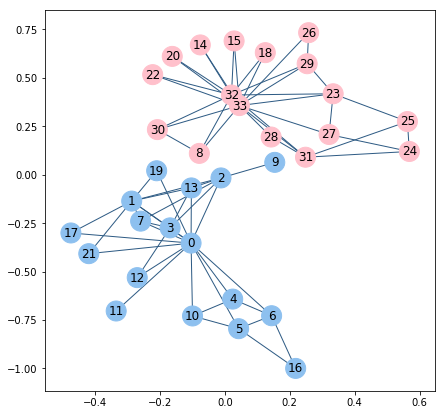

In [184]:
Gzk_u = nx.minimum_edge_cut(Gzk, s = 0, t = 33)
Gzk_st = edge_cut_graph(Gzk, Gzk_u)

subgraphs = list(nx.connected_component_subgraphs(Gzk_))
subgraphs1 = subgraphs[0].nodes()
subgraphs2 = subgraphs[1].nodes()

plt.figure(figsize=(7,7))
nx.draw_networkx(Gzk_st,pos=nx.drawing.spring_layout(Gzk, seed=11), 
                 with_labels=True,node_size=400, 
                 node_color = ['#8dc0ef' if x in subgraphs1 else 'pink' for x in Gzk.nodes], 
                 edge_color='#2e5b84')




**(ii) Girvan-Newman**

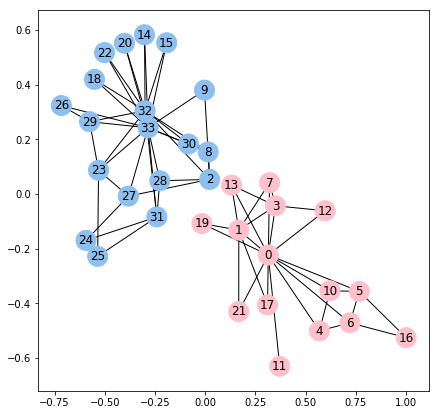

In [175]:
from networkx.algorithms.community.centrality import girvan_newman
 
comp = girvan_newman(Gzk)
Vs, Vt = next(comp)
Gzk_gn = cut_graph_partitions(Gzk, Vs, Vt)
plt.figure(figsize=(7,7))
nx.draw_networkx(Gzk_gn,  pos=nx.drawing.spring_layout(Gzk, seed=10), 
                 node_size=400, with_labels=True, 
                 node_color = ['#8dc0ef' if x in Vt else 'pink' for x in Gzk.nodes])

**(iii) Spectral partitioning (based on the Fiedler vector alone).**

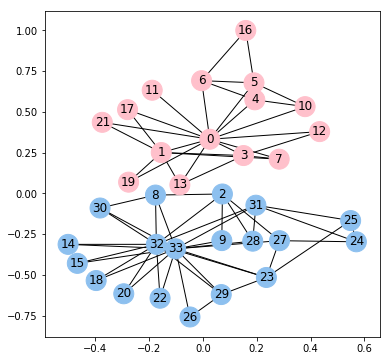

In [176]:
# TODO - Your code

Gzk_u = nx.fiedler_vector(Gzk)

Vs_eig = set(vi for i, vi in enumerate(Gzk.nodes()) if Gzk_u[i] >= 0)
Vt_eig = set(Gzk.nodes) - Vs_eig
Gzk_eig = cut_graph_partitions(Gzk, Vs_eig, Vt_eig)

plt.figure(figsize=(6,6))
nx.draw_networkx(Gzk_eig, pos=nx.drawing.kamada_kawai_layout(Gzk), node_size=400, with_labels=True, 
                node_color=['#8dc0ef' if x in Vs_eig else 'pink' for x in Gzk.nodes])

Next, from each partitioning select the set which contains Mr. Hi (node 0); let's call those the "loyals" of the partitioning.  Then, for all three partitionings, compute the Jaccard similarity score between the partitioning's "loyals".  Which partitionings are more similar?  Any intuition why that would be the case?

In [159]:
# TODO - Your code
def jaccard_score(Graph_):
    Graph_d = list(nx.connected_component_subgraphs(Graph_))
    subgraphs1_eig = Graph_d[0].nodes()
    subgraphs2_eig = Graph_d[1].nodes()
    score = 0
    if 0 in subgraphs1_eig: 
        preds = nx.jaccard_coefficient(Graph_d[0])
        for u, v, p in preds:
            if u == 0 or v ==0 :
                score += p
                print('(%d, %d) -> %.8f' % (u, v, p))
             
    elif 0 in subgraphs2_eig:
        preds = nx.jaccard_coefficient(Graph_d[1])
        for u, v, p in preds:
            if u == 0 or v == 0:
                score += p
                print('(%d, %d) -> %.8f' % (u, v, p))
    
    return score   

In [185]:
jaccard_score(Gzk_st) # stmin_cut

(0, 16) -> 0.14285714
(0, 9) -> 0.07142857


0.21428571428571427

In [163]:
jaccard_score(Gzk_eig) #fiedler_vector

(0, 16) -> 0.15384615


0.15384615384615385

In [178]:
jaccard_score(Gzk_gn) # girvan_newman

(0, 16) -> 0.15384615


0.15384615384615385

---

**Remarks (2.1)**

_Brief_ discussion of similarities/differences between partitionings based on different methods.

---

---

**Answers (2.1)**

Graph clustering problems are often approached via graph cuts.

Given an undirected, connected graph G = ( V , E ) and a pair of vertices s , t ∈  V, the value of a minimum s – t cut is equal to the value of a maximum flow from s to t.

---


### 2.2 Node rankings

Print out the vertex IDs (all 33) ranked according to the following centrality scores: (i) degree; (ii) closeness; (iii) shortest-path betweenness; (iv) PageRank. Also report all pairwise Kendall rank correlation coefficients $\tau$. How do Mr. Hi and John A. rank?  How does PageRank compare to degree ranking?  How do other rankings compare?

**Answer 2.2**

---
*Mr Hi = node 0 / John A. = node 33*

In degree centrality and between centrality John A. (node 33) is rank 1 and Mr. Hi is rank 2. 
In closeness centrality Mr Hi is rank 1 and John A. is rank 3. 
In page rank Mr Hi is rank 1 and John A. is rank 2.

---

In [194]:
# TODO - Your code
def top_k(scores, k=10):
    # Scores is a dictionary of node-score items
    return tuple(n for n, s in sorted(scores.items(), key=(lambda it: -it[1]))[:k])

def print_top_k(scores, k=10, title=None):
    # Simple auxiliary function
    if title is not None:
        print("%s:" % title)
        print("-" * (len(title) + 1))
    for i, v in enumerate(top_k(scores, k=k)):
        print("%2i. %s" % (i+1, v))

-----
(i) degree

(ii) closeness &nbsp;

(iii) shortest-path betweenness&nbsp;

(iv) PageRank

-----

In [200]:
Cf_deg  = nx.degree_centrality(Gzk)
Cf_deg_ =  unit_recale_dict(Cf_deg)

Cf_cc  = nx.closeness_centrality(Gzk)
Cf_cc_ =  unit_recale_dict(Cf_cc)

Cf_bet  = nx.betweenness_centrality(Gzk)
Cf_bet_ =  unit_recale_dict(Cf_bet)

Cf_pr  = nx.pagerank(Gzk) # pagerank scores
Cf_pr_ =  unit_recale_dict(Cf_pr)


In [206]:
print_top_k(Cf_deg_, 33, title="degree centrality")

degree centrality:
------------------
 1. 33
 2. 0
 3. 32
 4. 2
 5. 1
 6. 3
 7. 31
 8. 8
 9. 13
10. 23
11. 5
12. 6
13. 7
14. 27
15. 29
16. 30
17. 4
18. 10
19. 19
20. 24
21. 25
22. 28
23. 9
24. 12
25. 14
26. 15
27. 16
28. 17
29. 18
30. 20
31. 21
32. 22
33. 26


In [201]:
print_top_k(Cf_cc_, 33, title="closeness centrality")
    

closeness centrality:
---------------------
 1. 0
 2. 2
 3. 33
 4. 31
 5. 8
 6. 13
 7. 32
 8. 19
 9. 1
10. 3
11. 27
12. 30
13. 28
14. 7
15. 9
16. 23
17. 5
18. 6
19. 29
20. 4
21. 10
22. 17
23. 21
24. 24
25. 25
26. 12
27. 14
28. 15
29. 18
30. 20
31. 22
32. 11
33. 26


In [202]:
print_top_k(Cf_bet_, 30, title="betweenness centrality")

betweenness centrality:
-----------------------
 1. 0
 2. 33
 3. 32
 4. 2
 5. 31
 6. 8
 7. 1
 8. 13
 9. 19
10. 5
11. 6
12. 27
13. 23
14. 30
15. 3
16. 25
17. 29
18. 24
19. 28
20. 9
21. 4
22. 10
23. 7
24. 11
25. 12
26. 14
27. 15
28. 16
29. 17
30. 18


In [208]:
print_top_k(Cf_pr_, 33, title="Page Rank")


Page Rank:
----------
 1. 33
 2. 0
 3. 32
 4. 2
 5. 1
 6. 31
 7. 3
 8. 23
 9. 8
10. 13
11. 5
12. 6
13. 29
14. 27
15. 30
16. 7
17. 4
18. 10
19. 24
20. 25
21. 19
22. 28
23. 16
24. 26
25. 12
26. 17
27. 21
28. 14
29. 15
30. 18
31. 20
32. 22
33. 9


In [228]:
from scipy import stats

Cf_deg_v = list(Cf_deg_.values())
Cf_cc_v = list(Cf_cc_.values())
Cf_bet_v = list(Cf_bet_.values())
Cf_pr_v = list(Cf_pr_.values())



In [236]:
tau, p_value = stats.kendalltau(Cf_deg_v, Cf_cc_v)
tau


0.7862658374374362

In [237]:
tau, p_value = stats.kendalltau(Cf_deg_v, Cf_bet_v)
tau


0.8105546441128618

In [238]:
tau, p_value = stats.kendalltau(Cf_deg_v, Cf_pr_v)
tau

0.9280699696753142

In [239]:
tau, p_value = stats.kendalltau(Cf_cc_v, Cf_pr_v)
tau

0.674148058716386

In [240]:
tau, p_value = stats.kendalltau(Cf_cc_v, Cf_bet_v)
tau

0.7732428451348236

In [242]:
tau, p_value = stats.kendalltau(Cf_bet_v, Cf_pr_v)
tau

0.7368600904990009

---

**Remarks (2.2)**

_Brief_ discussion of similarities/differences between various node rankings.



---

## Part 3: Written questions

For this part, you do not need to write any code.  Type in your answers completely within the Markdown cell corresponding to each question.  Please use LaTeX for any equations you might need to write.

### 3.1 Spectrum and connectedness

Prove that the Laplacian of an undirected, unweighted graph has zero eigenvalue with multiplicity equal to the number of connected components.

\[ Hint: _One_ way to approach this (but not the _only_ one, clearly) is to first quickly prove that the above reduces to showing that a connected graph has zero eigenvalue with multiplicity one. \]

---

**Answer (3.1)**

---

### 3.2 NN error functions

For binary classification problems using a network with a logistic output activation function $\sigma(a)$, where the target variable takes values $t\in \{0,1\}$, we derived the appropriate error function as the _cross-entropy_ given by
$$ E(\mathbf{w}) := -\sum_n\left[t_n\ln y_n + (1-t_n)\ln(1-y_n)\right].  $$

Instead of a $0/1$ target variable, consider a $-1/+1$ target variable.  Show that an appropriate activation function would be the hyperbolic tangent ($\tanh$) and derive the corresponding error function.

\[ Hint: Consider the linear transformation mapping $\{0,1\}$ into $\{-1,+1\}$. \]

---

**Answer (3.2)**

---